# 数据预处理


## 1. 数据读取与筛选


读取2017、2018年的数据


In [1]:
import pandas as pd
import os

# 设置文件夹路径
folder_path_1 = "Data/Weather 2017/"
folder_path_2 = "Data/Weather 2018/"

# 获取文件夹中所有csv文件的路径
file_paths_1 = [
    os.path.join(folder_path_1, f)
    for f in os.listdir(folder_path_1)
    if f.endswith(".csv")
]
file_paths_2 = [
    os.path.join(folder_path_2, f)
    for f in os.listdir(folder_path_2)
    if f.endswith(".csv")
]

file_paths = file_paths_1 + file_paths_2

合并各月份数据，筛选有用数据


In [2]:
# 选取需要的列
COLUMN_INDEX = [
    "Index",
    "Temp (°C)",
    "Dew Point Temp (°C)",
    "Rel Hum (%)",
    "Wind Spd (km/h)",
    "Visibility (km)",
    "Stn Press (kPa)",
]

# 读取所有csv文件并合并为一个DataFrame
df = pd.concat([pd.read_csv(f) for f in file_paths])

# 最左侧加入表头为Index的序号
df.insert(0, "Index", range(len(df)))

data = df[COLUMN_INDEX]

# 合并后的DataFrame
data

,Index,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
0,0,1.5,-3.6,69.0,39.0,16.1,99.81
1,1,1.5,-3.9,67.0,35.0,16.1,100.01
2,2,1.0,-4.3,68.0,32.0,16.1,100.14
3,3,1.2,-4.3,67.0,37.0,16.1,100.32
4,4,1.3,-4.4,66.0,28.0,16.1,100.48
...,...,...,...,...,...,...,...
739,17515,3.2,2.6,96.0,32.0,4.8,99.74
740,17516,3.6,3.2,97.0,32.0,4.8,99.37
741,17517,4.0,3.6,97.0,32.0,3.2,99.15
742,17518,4.0,3.6,97.0,30.0,4.0,98.80


查看是否存在缺失数据


In [3]:
data.isnull().to_numpy().sum()


85

插值结果补充缺失的数据


In [4]:
data=data.interpolate(method="linear")
data.isnull().to_numpy().sum()


0

将数据保存为.csv格式


In [5]:
data.to_csv("Data/DataSet.csv", index=False)


## 2. Spearman相关性分析


考虑到气象的周期性规律，直接对2017、2018两年的数据做Spearman相关性分析


In [6]:
SpearmanCorr = data.corr(method="spearman")
SpearmanCorr


,Index,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Index,1.000000,0.126228,0.116424,0.013806,-0.066329,0.012884,0.122644
Temp (°C),0.126228,1.000000,0.951711,0.144156,-0.286975,0.080501,-0.204658
Dew Point Temp (°C),0.116424,0.951711,1.000000,0.416204,-0.328090,-0.047953,-0.273448
Rel Hum (%),0.013806,0.144156,0.416204,1.000000,-0.211712,-0.473570,-0.325723
Wind Spd (km/h),-0.066329,-0.286975,-0.328090,-0.211712,1.000000,0.069984,-0.137515
Visibility (km),0.012884,0.080501,-0.047953,-0.473570,0.069984,1.000000,0.151064
Stn Press (kPa),0.122644,-0.204658,-0.273448,-0.325723,-0.137515,0.151064,1.000000


画图并保存


c:\Users\CTC\Desktop\temporary working library\Python\Optimization_Group_Work\Visualization.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


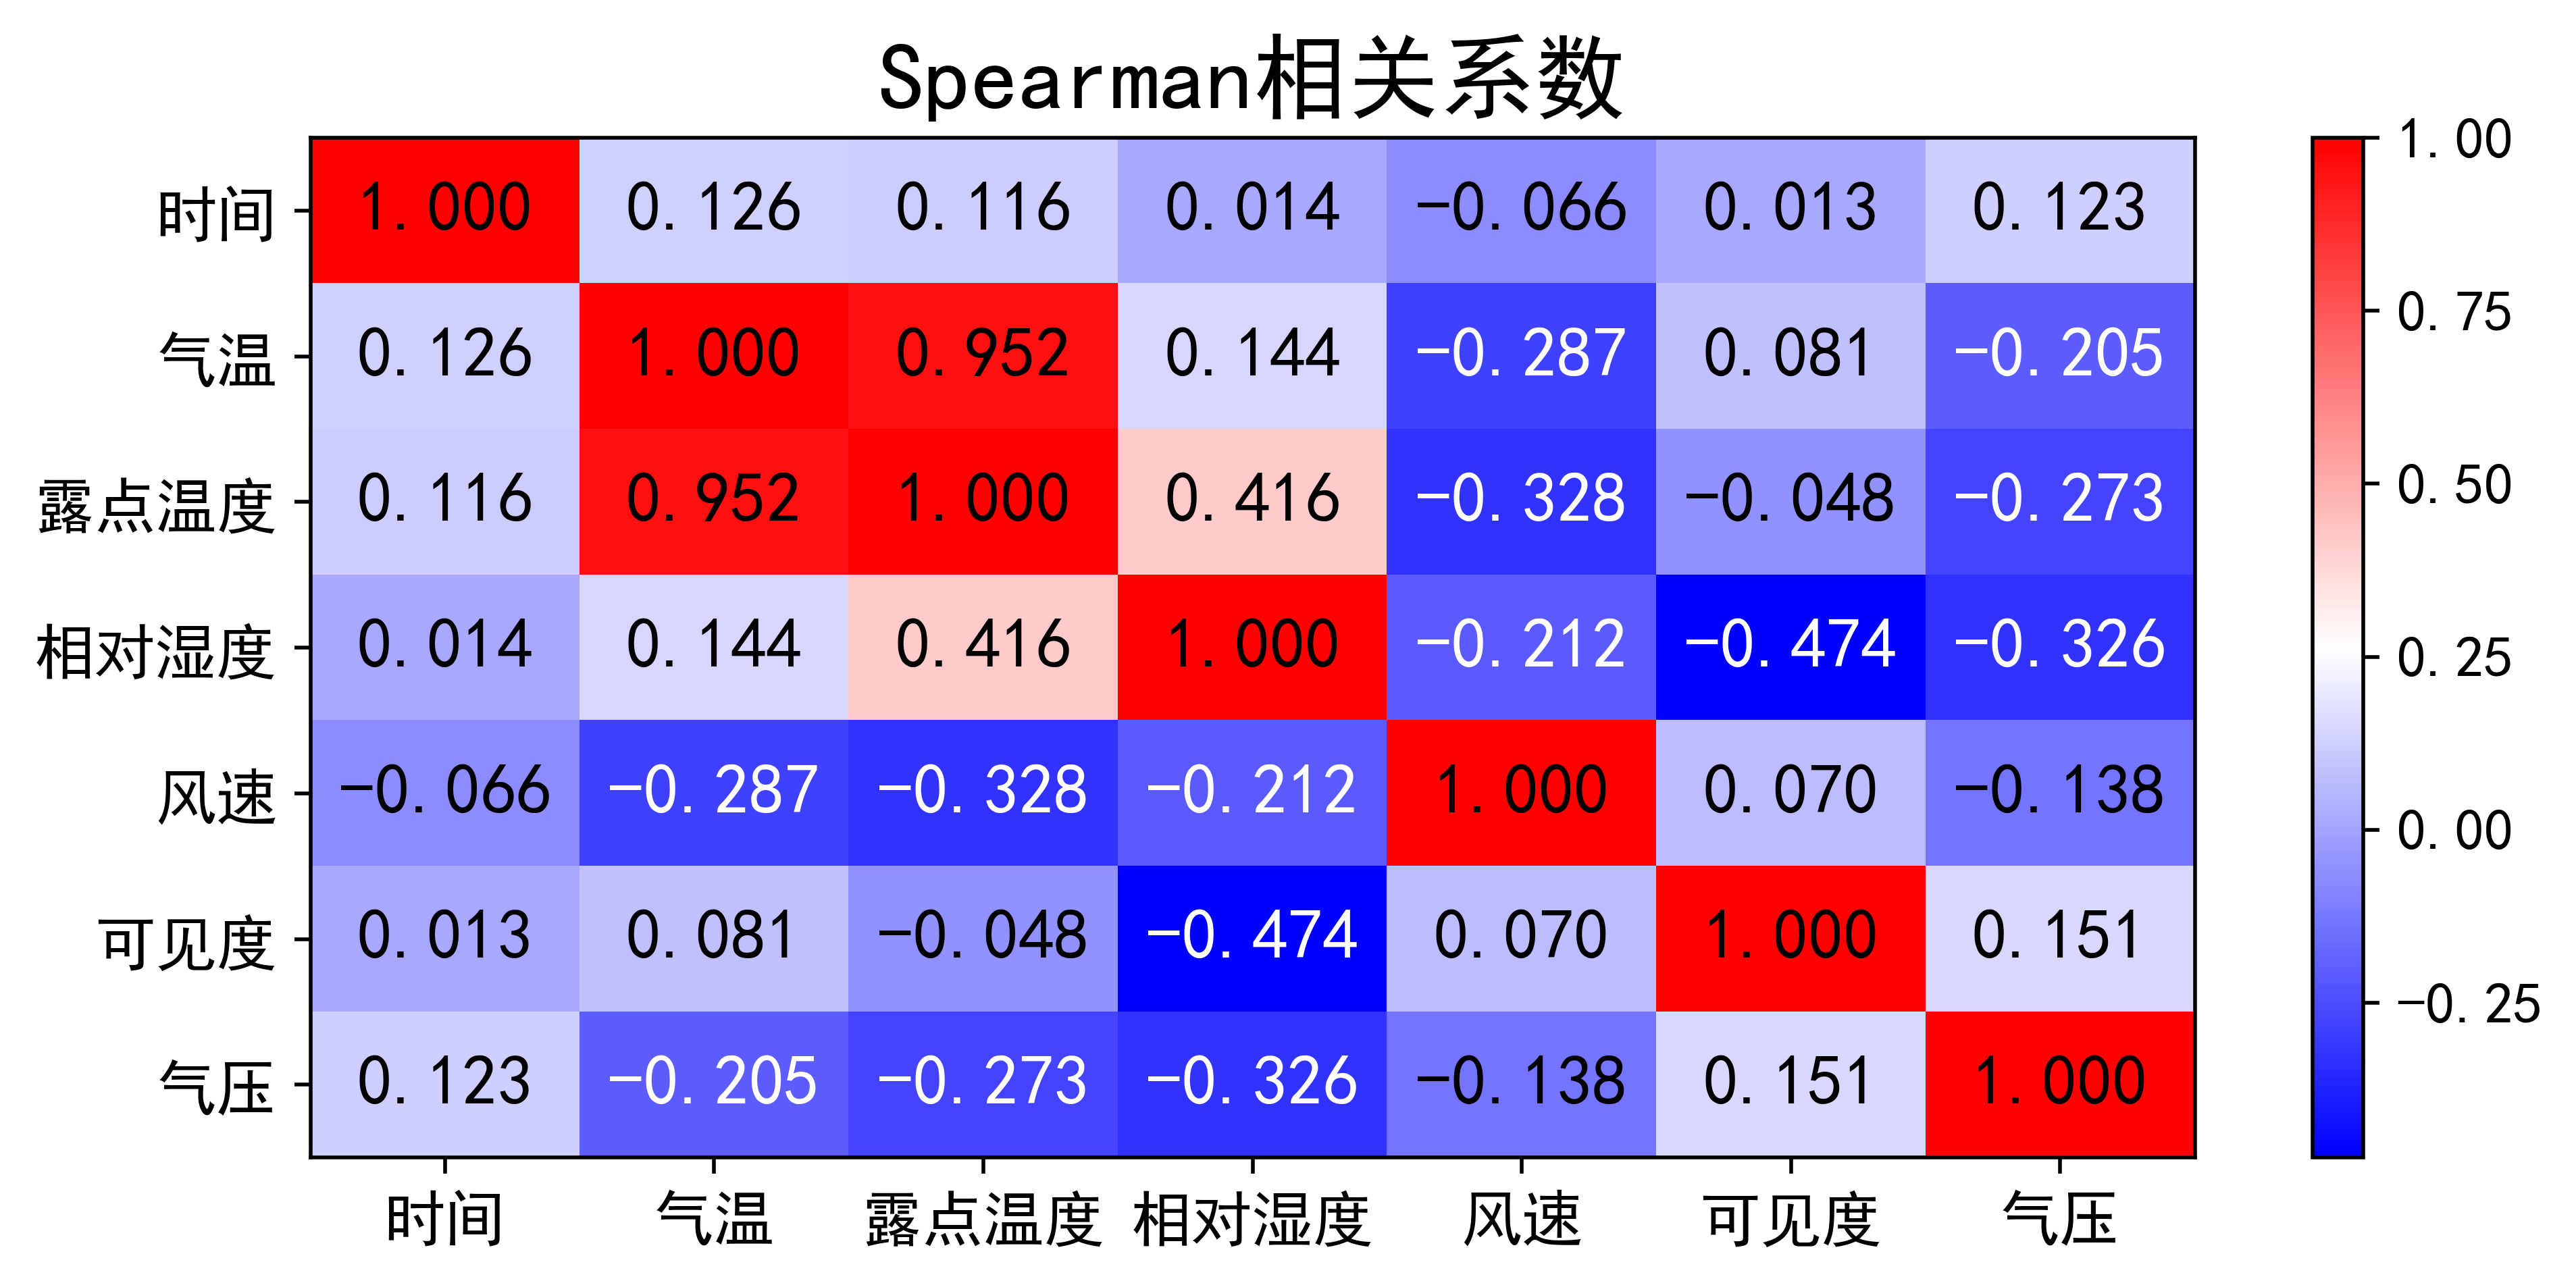

In [7]:
from Visualization import *

FONTSIZES = [15, 12, 20]
TICK = [
    "时间",
    "气温",
    "露点温度",
    "相对湿度",
    "风速",
    "可见度",
    "气压",
]
FIG_SIZE = (9, 4)
FIG_DPI = 500


SpearmanHeatMap(
    SpearmanCorr.to_numpy(),
    TICK=TICK,
    TITLE="Spearman相关系数",
    ROTATION=[0, 0],
    SAVE_FIG=True,
)